Route: Goal 2 -> 2.2 Feature Engineering#2  
Purpose: to implement feature engineering(Standard + PCA)  
Kernel: Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# 2.2.1 Delete some irrelevant features

<AxesSubplot:>

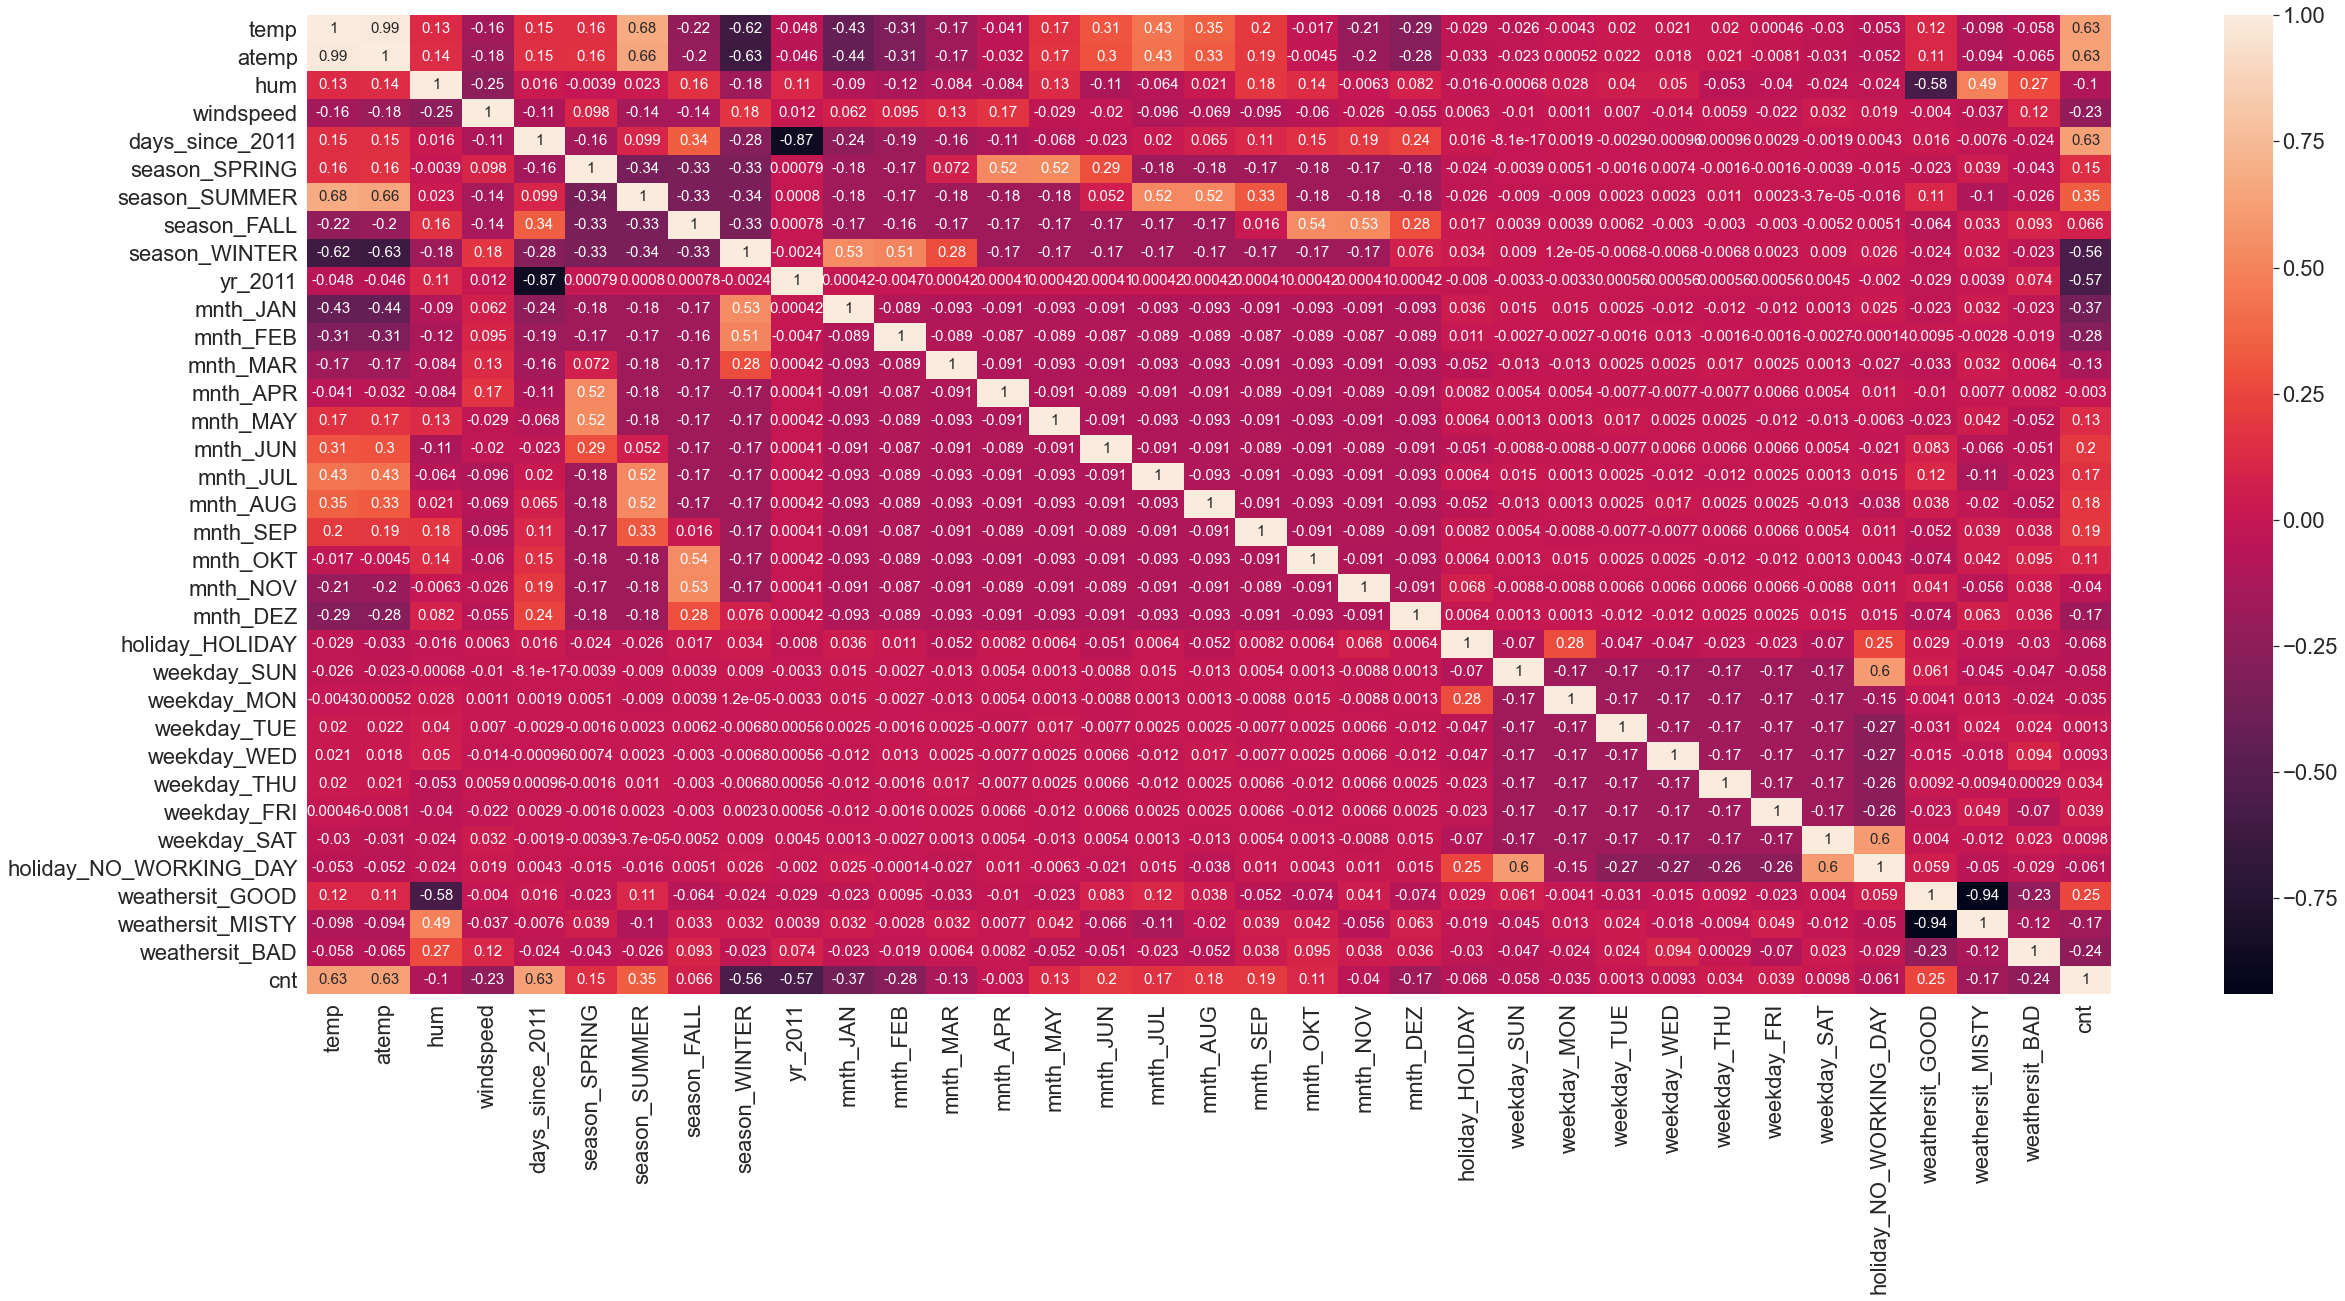

In [2]:
bike = pd.read_csv('./DataSet/bike_FE1.csv')
X = bike.drop(columns = ['Unnamed: 0'], axis=1)
sns.set_context({"figure.figsize":(36,18)})
sns.set(font_scale=2)
sns.heatmap(X.corr(), annot=True,annot_kws={'size': 15})

In [3]:
# Delete some irrelevant features
X = bike.drop(columns = ['Unnamed: 0', 'cnt'], axis=1) # Not necessary for X
X = X.drop(columns = ['temp', 'atemp'], axis=1) # Too much correlation with other features
X = X.drop(columns = ['season_SPRING', 'season_SUMMER', 'season_FALL', 'season_WINTER', 'yr_2011', 'mnth_JAN', 'mnth_FEB', 'mnth_MAR', 'mnth_APR', 'mnth_MAY', 'mnth_JUN', 'mnth_JUL', 'mnth_AUG', 'mnth_SEP', 'mnth_OKT', 'mnth_NOV', 'mnth_DEZ'], axis=1) # Could be replaced by days_since_2011
X = X.drop(columns = ['holiday_NO_WORKING_DAY'], axis=1) # Not so strong correlation with cnt
y = bike[['cnt']]

# 2.2.2 Standard and PCA

In [4]:
scale = StandardScaler()  # instantiate a z-scaler object
X = pd.DataFrame(scale.fit_transform(X),columns = X.columns)
bike = X.join(y)

In [5]:
## PCA Variables:
# We take hum and windspeed (which are two RATIO variables for PCA)
## NONE-PCA Variablers: 
# We leave days_since_2011 alone with dummy variables because it is a kind of INTERVAL variables
#  , which we are not able to PCA together.
# Also, we do not do PCA for dummy variables, because the 0 or 1 in dummy variables is not meaningful at all.
# If we conduct PCA, the result is not explanable.
X = bike.drop(columns = ['hum', 'windspeed','cnt'], axis=1)
X.to_csv('./DataSet/bike_notneedPCA.csv')
X = bike[['hum', 'windspeed']]
X.to_csv('./DataSet/bike_needPCA.csv')
y.to_csv('./DataSet/bike_label.csv')

<AxesSubplot:>

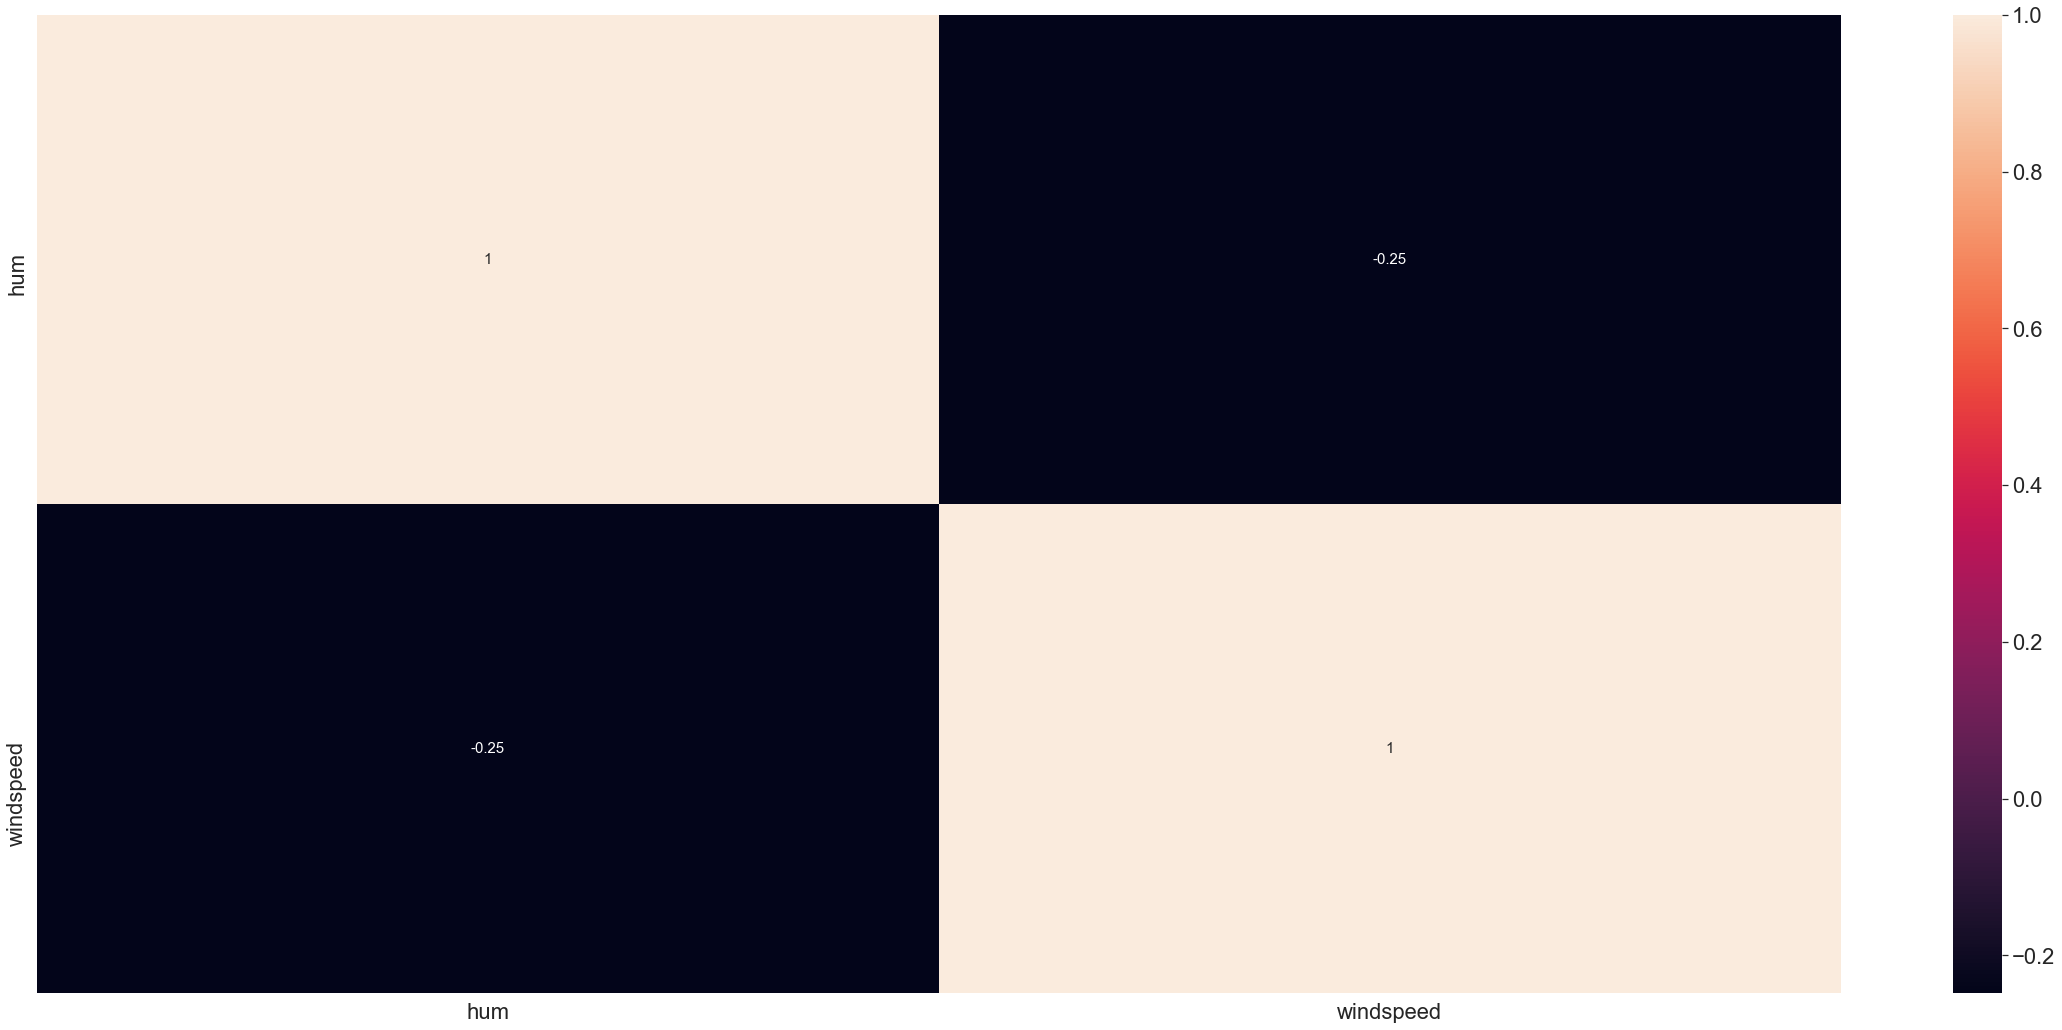

In [6]:
X = pd.read_csv('./DataSet/bike_needPCA.csv')
X = X.drop(columns = ['Unnamed: 0'])
sns.set_context({"figure.figsize":(36,18)})
sns.set(font_scale=2)
sns.heatmap(X.corr(), annot=True,annot_kws={'size': 15})

In [7]:
pca = PCA(n_components=2)
pca.fit(X)
pca_X = pca.transform(X)
# The percentage variance explained for each principal components
print(pca.explained_variance_ratio_)

[0.62424455 0.37575545]


In [8]:
k=0
for i in pca.explained_variance_ratio_:
    k+=i
    
    
print("Information kept: {}%".format(round(k*100, 2)))

Information kept: 100.0%


<AxesSubplot:>

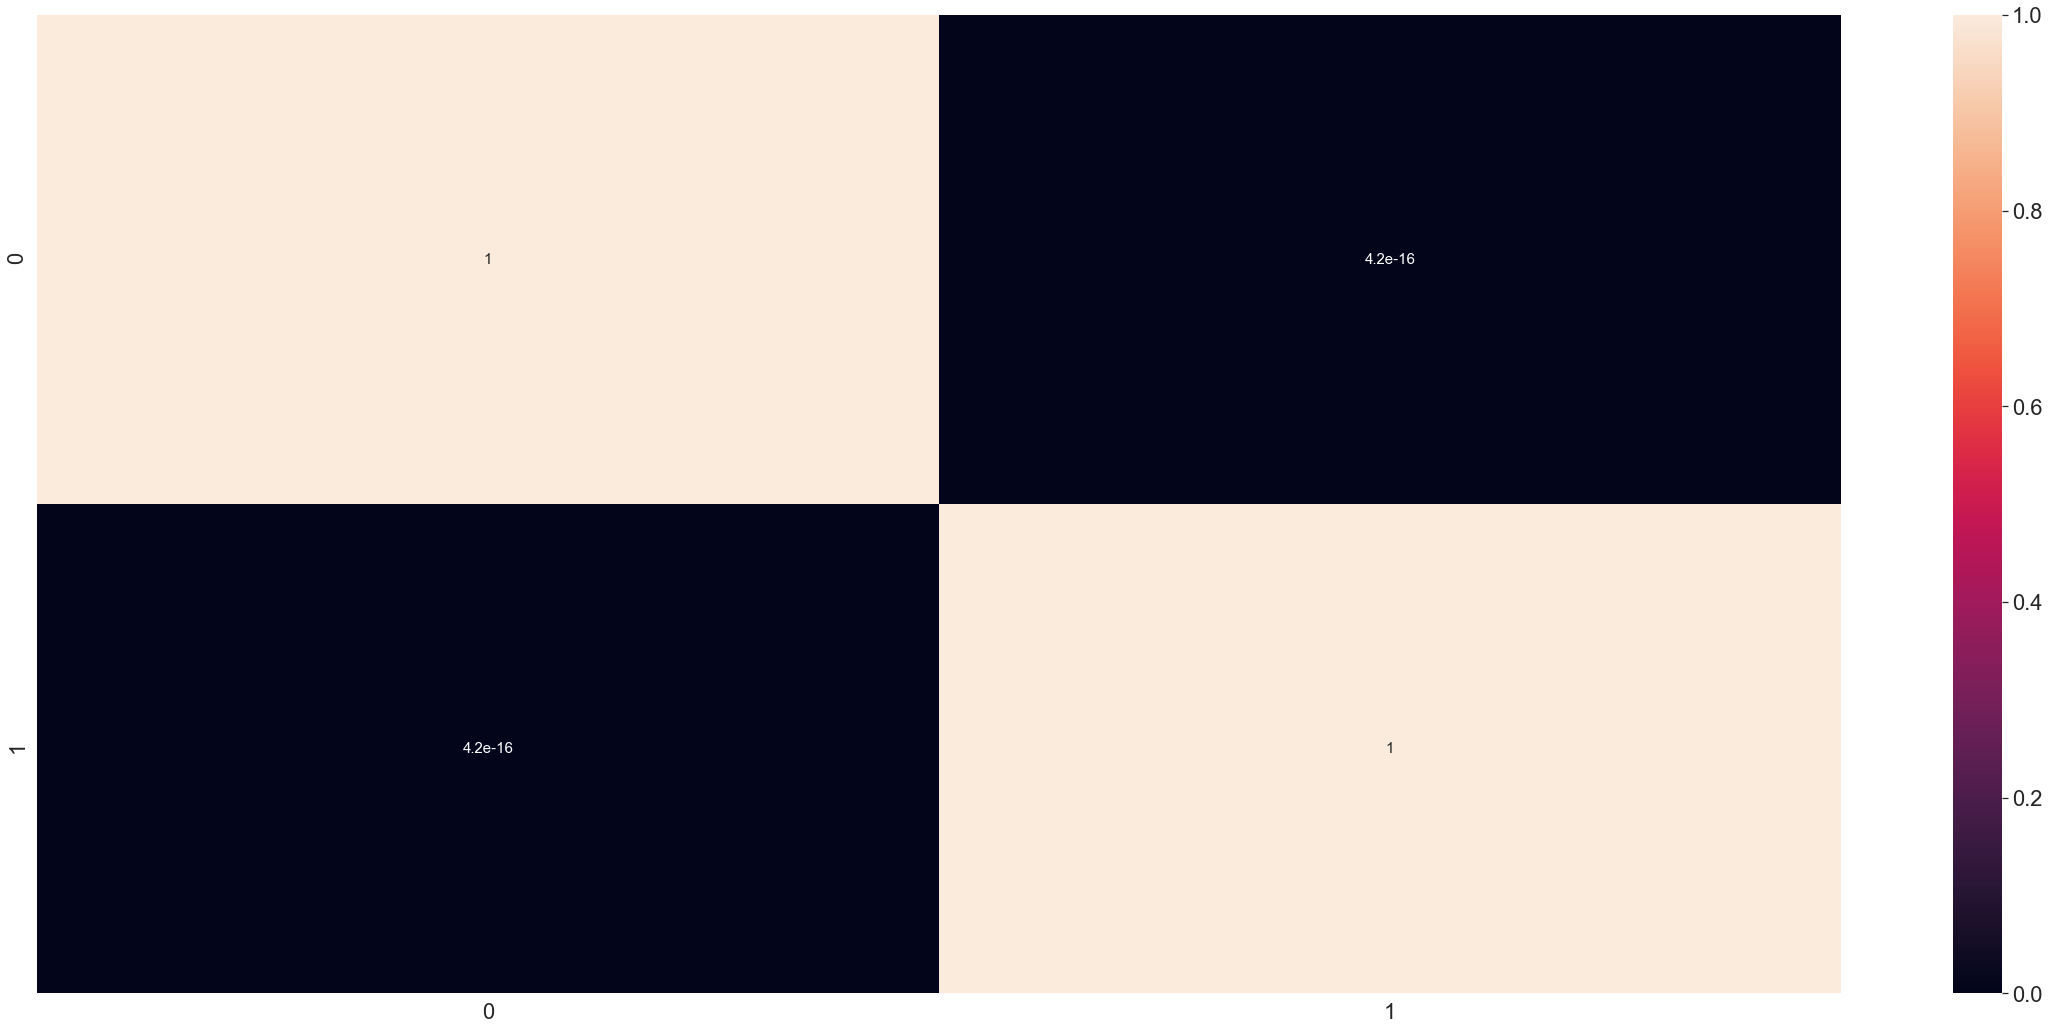

In [9]:
pca_X = pd.DataFrame(pca_X)
sns.set_context({"figure.figsize":(36,18)})
sns.set(font_scale=2)
sns.heatmap(pca_X.corr(), annot=True,annot_kws={'size': 15})

In [10]:
pca_components = pd.DataFrame(pca.components_, columns = X.columns)
bike_notneedPCA = pd.read_csv('./DataSet/bike_notneedPCA.csv')
bike_notneedPCA = bike_notneedPCA.drop(columns = 'Unnamed: 0')
bike_output = pca_X.join(bike_notneedPCA)
bike_output = bike_output.join(y)
bike_output

,0,1,days_since_2011,holiday_HOLIDAY,weekday_SUN,weekday_MON,weekday_TUE,weekday_WED,weekday_THU,weekday_FRI,weekday_SAT,weathersit_GOOD,weathersit_MISTY,weathersit_BAD,cnt
0,-1.158285,0.609724,-1.729683,-0.171981,-0.409551,-0.409551,-0.407270,-0.407270,-0.407270,-0.407270,2.441701,-1.314387,1.399826,-0.171981,985
1,0.191264,0.868832,-1.724944,-0.171981,2.441701,-0.409551,-0.407270,-0.407270,-0.407270,-0.407270,-0.409551,-1.314387,1.399826,-0.171981,801
2,1.474958,-0.419061,-1.720205,-0.171981,-0.409551,2.441701,-0.407270,-0.407270,-0.407270,-0.407270,-0.409551,0.760811,-0.714374,-0.171981,1349
3,-0.089553,-0.461748,-1.715466,-0.171981,-0.409551,-0.409551,2.455371,-0.407270,-0.407270,-0.407270,-0.409551,0.760811,-0.714374,-0.171981,1562
4,0.915836,-0.981323,-1.710728,-0.171981,-0.409551,-0.409551,-0.407270,2.455371,-0.407270,-0.407270,-0.409551,0.760811,-0.714374,-0.171981,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.333334,1.581963,1.710728,-0.171981,-0.409551,-0.409551,-0.407270,-0.407270,2.455371,-0.407270,-0.409551,-1.314387,1.399826,-0.171981,2114
727,-0.131446,-0.507963,1.715466,-0.171981,-0.409551,-0.409551,-0.407270,-0.407270,-0.407270,2.455371,-0.409551,-1.314387,1.399826,-0.171981,3095
728,-1.224669,0.017564,1.720205,-0.171981,-0.409551,-0.409551,-0.407270,-0.407270,-0.407270,-0.407270,2.441701,-1.314387,1.399826,-0.171981,1341
729,2.181501,0.745135,1.724944,-0.171981,2.441701,-0.409551,-0.407270,-0.407270,-0.407270,-0.407270,-0.409551,0.760811,-0.714374,-0.171981,1796


In [11]:
bike_output.to_csv('./DataSet/bike_pca.csv')
pca_components.to_csv('./DataSet/pca_components.csv')